BANK MARKETING:

Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not

Business Use Case:

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Project Description:

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

About The Dataset:

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
Dataset Attributes:

Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign
Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)



Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Bank%20Marketing
•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Bank%20Marketing/termdeposit_test.csv
•	https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv


*Statement Problem:To build a model that will predict whether a customer will subscribe to a term deposit or not*.

To build a predictive model for whether a customer will subscribe to a term deposit, we will follow these steps:

1. Load the Dataset
2. Data Preprocessing
3. Exploratory Data Analysis (EDA)
4. Model Training
5. Model Evaluation
6. Make Predictions on the Test Set
7. Save Predictions

In [1]:
### importing libraries to use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

import warnings
warnings.filterwarnings ("ignore")

Load the Dataset

In [2]:
#import the dataset
link_1="https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Bank%20Marketing/termdeposit_train.csv"

link_2="https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Bank%20Marketing/termdeposit_test.csv"

train_link=pd.read_csv(link_1)
test_link=pd.read_csv(link_2)

In [3]:
train_link.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
test_link.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


Observation:

The train and  test datasets contain the client and call details and the datas are numerical and categorical datas. There are 31647 samples in the datasets with 17 columns (features) in the test dataset and 18 columns in the train dataset of which 1 is the target variable “subscribed” which is not included in the test columns.


In [5]:
test_link

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


Observation:

The Test dataset contain the client and call details and the datas are numerical and categorical datas. There are 31647 samples in the dataset with 17 columns which are to be used to predict whether a new set of clients will subscribe the term deposit with the trained model.

Data Preprocessing

In [6]:
#Columns present in the dataset 
train_link.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [7]:
#shape of the Data
train_link.shape

(31647, 18)

In [8]:
# Checking the column information
train_link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


Observation:

The columns have different data types made up of 10 are object Dtypes and 8 integers. 

No missing information.

In [9]:
# Check for missing values
train_link.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no Null values in the Training dataset

In [10]:
#Unique values in each of the colums

train_link.nunique().to_frame("Unique Values")

,Unique Values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


In [11]:
train_link['subscribed'].unique()

array(['no', 'yes'], dtype=object)

In [12]:
# Convert the target variable 'subscribed' to binary format
train_link['subscribed'] = train_link['subscribed'].map({'yes': 1, 'no': 0})

In [13]:
train_link

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,0
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,1
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,0
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,0


In [14]:
#Seperating the data into Categorical and Numerical Columns

categorical_col =[]
for i in train_link.dtypes.index:
    if train_link.dtypes[i]=='object':
        categorical_col.append(i)
print('Categorical Columns: ',categorical_col)
print('\n')


numerical_col =[]
for i in train_link.dtypes.index:
    if train_link.dtypes[i]!='object':
        numerical_col.append(i)
print('Numerical Columns: ',numerical_col)

Categorical Columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


Numerical Columns:  ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'subscribed']


In [15]:
categorical_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [16]:
train_link.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


In [17]:
test_link.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [18]:
test_link

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


Exploratory Data Analysis (EDA)

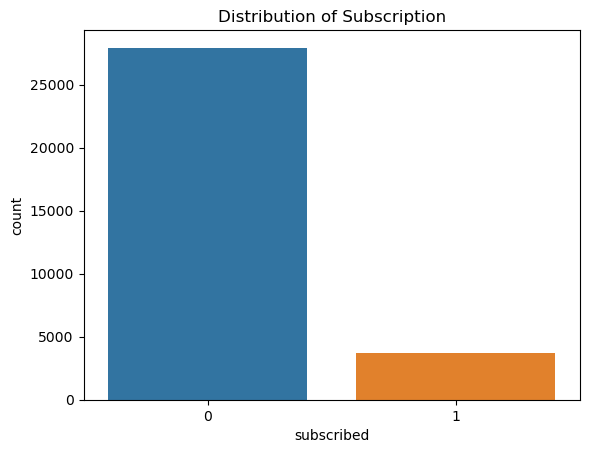

In [19]:
# Plot the distribution of the target variable
sns.countplot(x='subscribed', data=train_link)
plt.title('Distribution of Subscription')
plt.show()

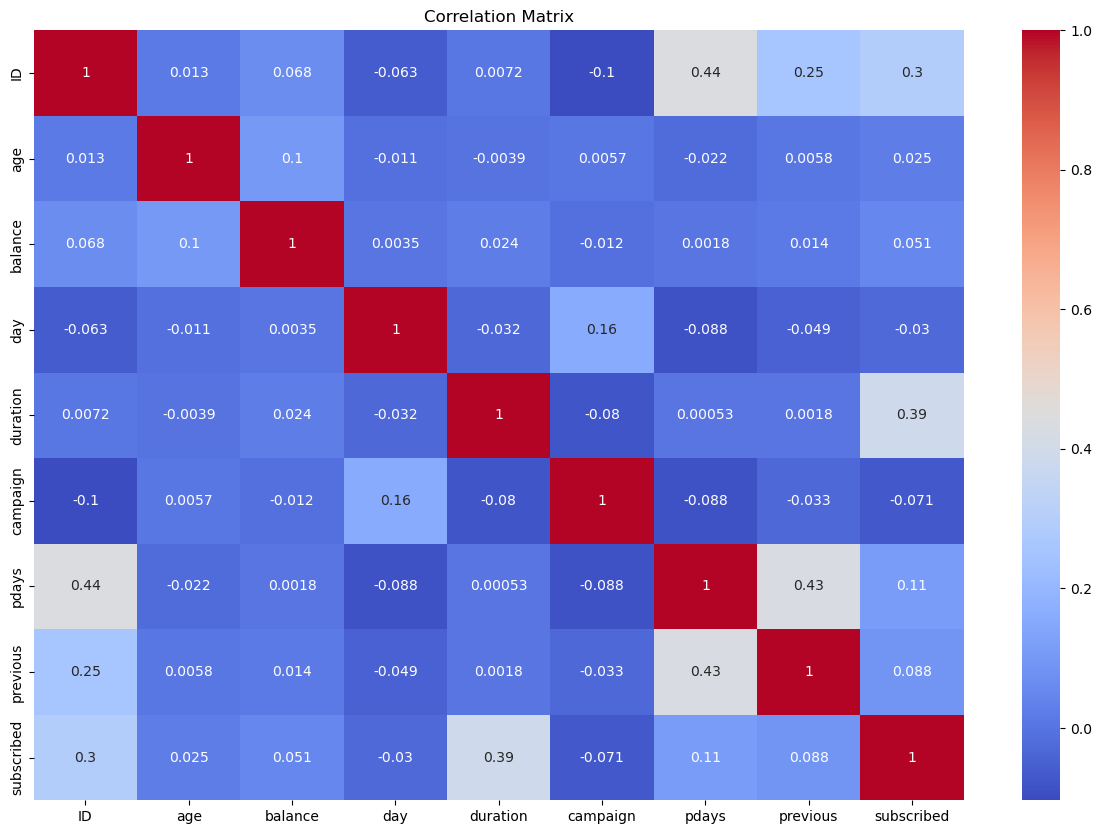

In [20]:
# Correlation matrix
corr = train_link.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
#Statistical interpretation of the Dataset
train_link.describe()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272,0.117389
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529,0.321888
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [22]:
cor_train =train_link.corr()
cor_train

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


In [23]:
cor_test =test_link.corr()
cor_test

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.018874,0.086916,-0.056813,0.026686,-0.101389,0.441437,0.321845
age,0.018874,1.000000,0.085246,-0.004622,-0.006456,0.002439,-0.027797,-0.011326
balance,0.086916,0.085246,1.000000,0.006890,0.015375,-0.020524,0.007136,0.024824
day,-0.056813,-0.004622,0.006890,1.000000,-0.025344,0.170421,-0.105314,-0.060719
duration,0.026686,-0.006456,0.015375,-0.025344,1.000000,-0.094653,-0.006308,-0.000415
campaign,-0.101389,0.002439,-0.020524,0.170421,-0.094653,1.000000,-0.091116,-0.032366
pdays,0.441437,-0.027797,0.007136,-0.105314,-0.006308,-0.091116,1.000000,0.534085
previous,0.321845,-0.011326,0.024824,-0.060719,-0.000415,-0.032366,0.534085,1.000000


In [24]:
# Define input features and target variable
x = train_link.drop(["subscribed","ID"], axis=1)
y= train_link["subscribed"]
test_link=test_link.drop(["ID"], axis=1)


In [25]:
# Encode categorical variables using one-hot encoding
x =pd.get_dummies(x, drop_first=True)
test_link = pd.get_dummies(test_link, drop_first=True)

In [26]:
# Ensure both train and test datasets have the same columns
missing_cols = set(x.columns) - set(test_link.columns)
for col in missing_cols:
    test_link[col] = 0
test_link = test_link[x.columns]

In [27]:
x.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,56,1933,19,44,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,31,3,20,91,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,27,891,18,240,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,57,3287,22,867,1,84,3,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,31,119,4,380,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
test_link.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,32,118,15,20,6,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,78,2787,1,372,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,31,144,16,676,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,57,3777,13,65,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,45,-705,3,111,1,-1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


Model Training

Split the training data and train a classification model.


In [29]:
# Spliting the data into Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Training and Evaluation:

1. Stochastic Gradient Descent (SGD):

In [30]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)

sgd.score(x_train, y_train)

acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)

acc_sgd

83.46

2. Random Forest:

In [31]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_pred = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

100.0

3. Logistic Regression:

In [32]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

89.17

4. K Nearest Neighbor:

In [33]:
knn =KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train) 
Y_pred = knn.predict(x_test) 
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

92.19

5. Gaussian Naive Bayes:

In [34]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)
Y_pred =gaussian.predict(x_test) 
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

85.74

6. Perceptron:

In [35]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(x_train, y_train)

Y_pred = perceptron.predict(x_test)

acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron

87.27

7. Linear Support Vector Machine:

In [36]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

Y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

70.39

8. Decision Tree:

In [37]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  
Y_pred = decision_tree.predict(x_test)  
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

100.0

Which is the best Model?

In [38]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
92.19,KNN
89.17,Logistic Regression
87.27,Perceptron
85.74,Naive Bayes
83.46,Stochastic Gradient Decent
70.39,Support Vector Machines


As we can see, Random Forest has the best Score ranked the 1st on the table, indicating the best model.

In [39]:
#cross validation for Random forest
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=42)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.90679305 0.90323855 0.9063981  0.90323855 0.90244866 0.90718799
 0.90402844 0.89885421 0.8964836  0.90596602]
Mean: 0.9034637165810615
Standard Deviation: 0.003335371989084375


In [40]:
from sklearn.model_selection import cross_val_score
rf = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.87401264 0.8728278  0.87124803 0.87559242 0.87401264 0.86887836
 0.85860979 0.87475306 0.87198736 0.87514816]
Mean: 0.8717070256153866
Standard Deviation: 0.004774222087167463


The Mean Score for Random forest Classifier Model has Mean Score 90% while that of the Decision Tree is 87%.Hence the Random forest give more accurate prediction.

In [41]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [42]:
# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')

In [43]:
# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Print the best parameters and score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best ROC AUC Score: {grid_search.best_score_}')


Best Parameters: {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best ROC AUC Score: 0.8611391842866917


The ROC Curve final model shows the AUC score for the model to be of 86%

In [44]:
# Initialize the model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(x_train, y_train)

# Predict on the validation set
y_pred = random_forest.predict(x_test)
y_pred_proba = random_forest.predict_proba(x_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_proba)}')

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5599
           1       0.63      0.39      0.48       731

    accuracy                           0.90      6330
   macro avg       0.78      0.68      0.71      6330
weighted avg       0.89      0.90      0.89      6330

ROC AUC Score: 0.9256899011426948


# Make Predictions on the Test Set

Use the trained model to make predictions on the test dataset.

In [45]:
test_link

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,32,118,15,20,6,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,78,2787,1,372,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,31,144,16,676,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,57,3777,13,65,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,45,-705,3,111,1,-1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,45,28,148,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13560,54,2281,20,158,1,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
13561,35,285,29,136,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13562,29,464,9,208,2,91,3,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [47]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x,y)

RandomForestClassifier()

In [48]:
# Predict on the test set
test_predictions = random_forest.predict(test_link)
test_link['subscribed'] = test_predictions

# Map binary predictions back to 'yes' and 'no'
test_link['subscribed'] = test_link['subscribed'].map({1: 'yes', 0: 'no'})

In [54]:
test_link

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,subscribed
0,32,118,15,20,6,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,no
1,78,2787,1,372,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,no
2,31,144,16,676,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,no
3,57,3777,13,65,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,no
4,45,-705,3,111,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,45,28,148,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,no
13560,54,2281,20,158,1,-1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,no
13561,35,285,29,136,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,no
13562,29,464,9,208,2,91,3,0,0,0,...,0,0,0,1,0,0,0,1,0,yes


# Save the predictions


In [55]:
test_link['subscribed'].to_csv('deposit_predictions.csv', index=False)
print('Predictions saved to deposit_predictions.csv')

Predictions saved to deposit_predictions.csv
